In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import src.bayesian_stats as bst

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.2.2


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.95

In [3]:
df_n30 = pd.read_csv('../kruschke_data/HtWtData30.csv')
df_n30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   male    30 non-null     int64  
 1   height  30 non-null     float64
 2   weight  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [4]:
df_n30.head()

,male,height,weight
0,0,64.0,136.4
1,0,62.3,215.1
2,1,67.9,173.6
3,0,64.2,117.3
4,0,64.8,123.3


In [5]:
# Standardize the data
zheight, mu_h, sigma_h = bst.standardize(df_n30.height)
zy, mu_y, sigma_y = bst.standardize(df_n30.weight)

In [12]:
model, idata = bst.robust_linear_regression(zheight, zy, n_draws=3000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, sigma, nu_minus_one]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 21 seconds.


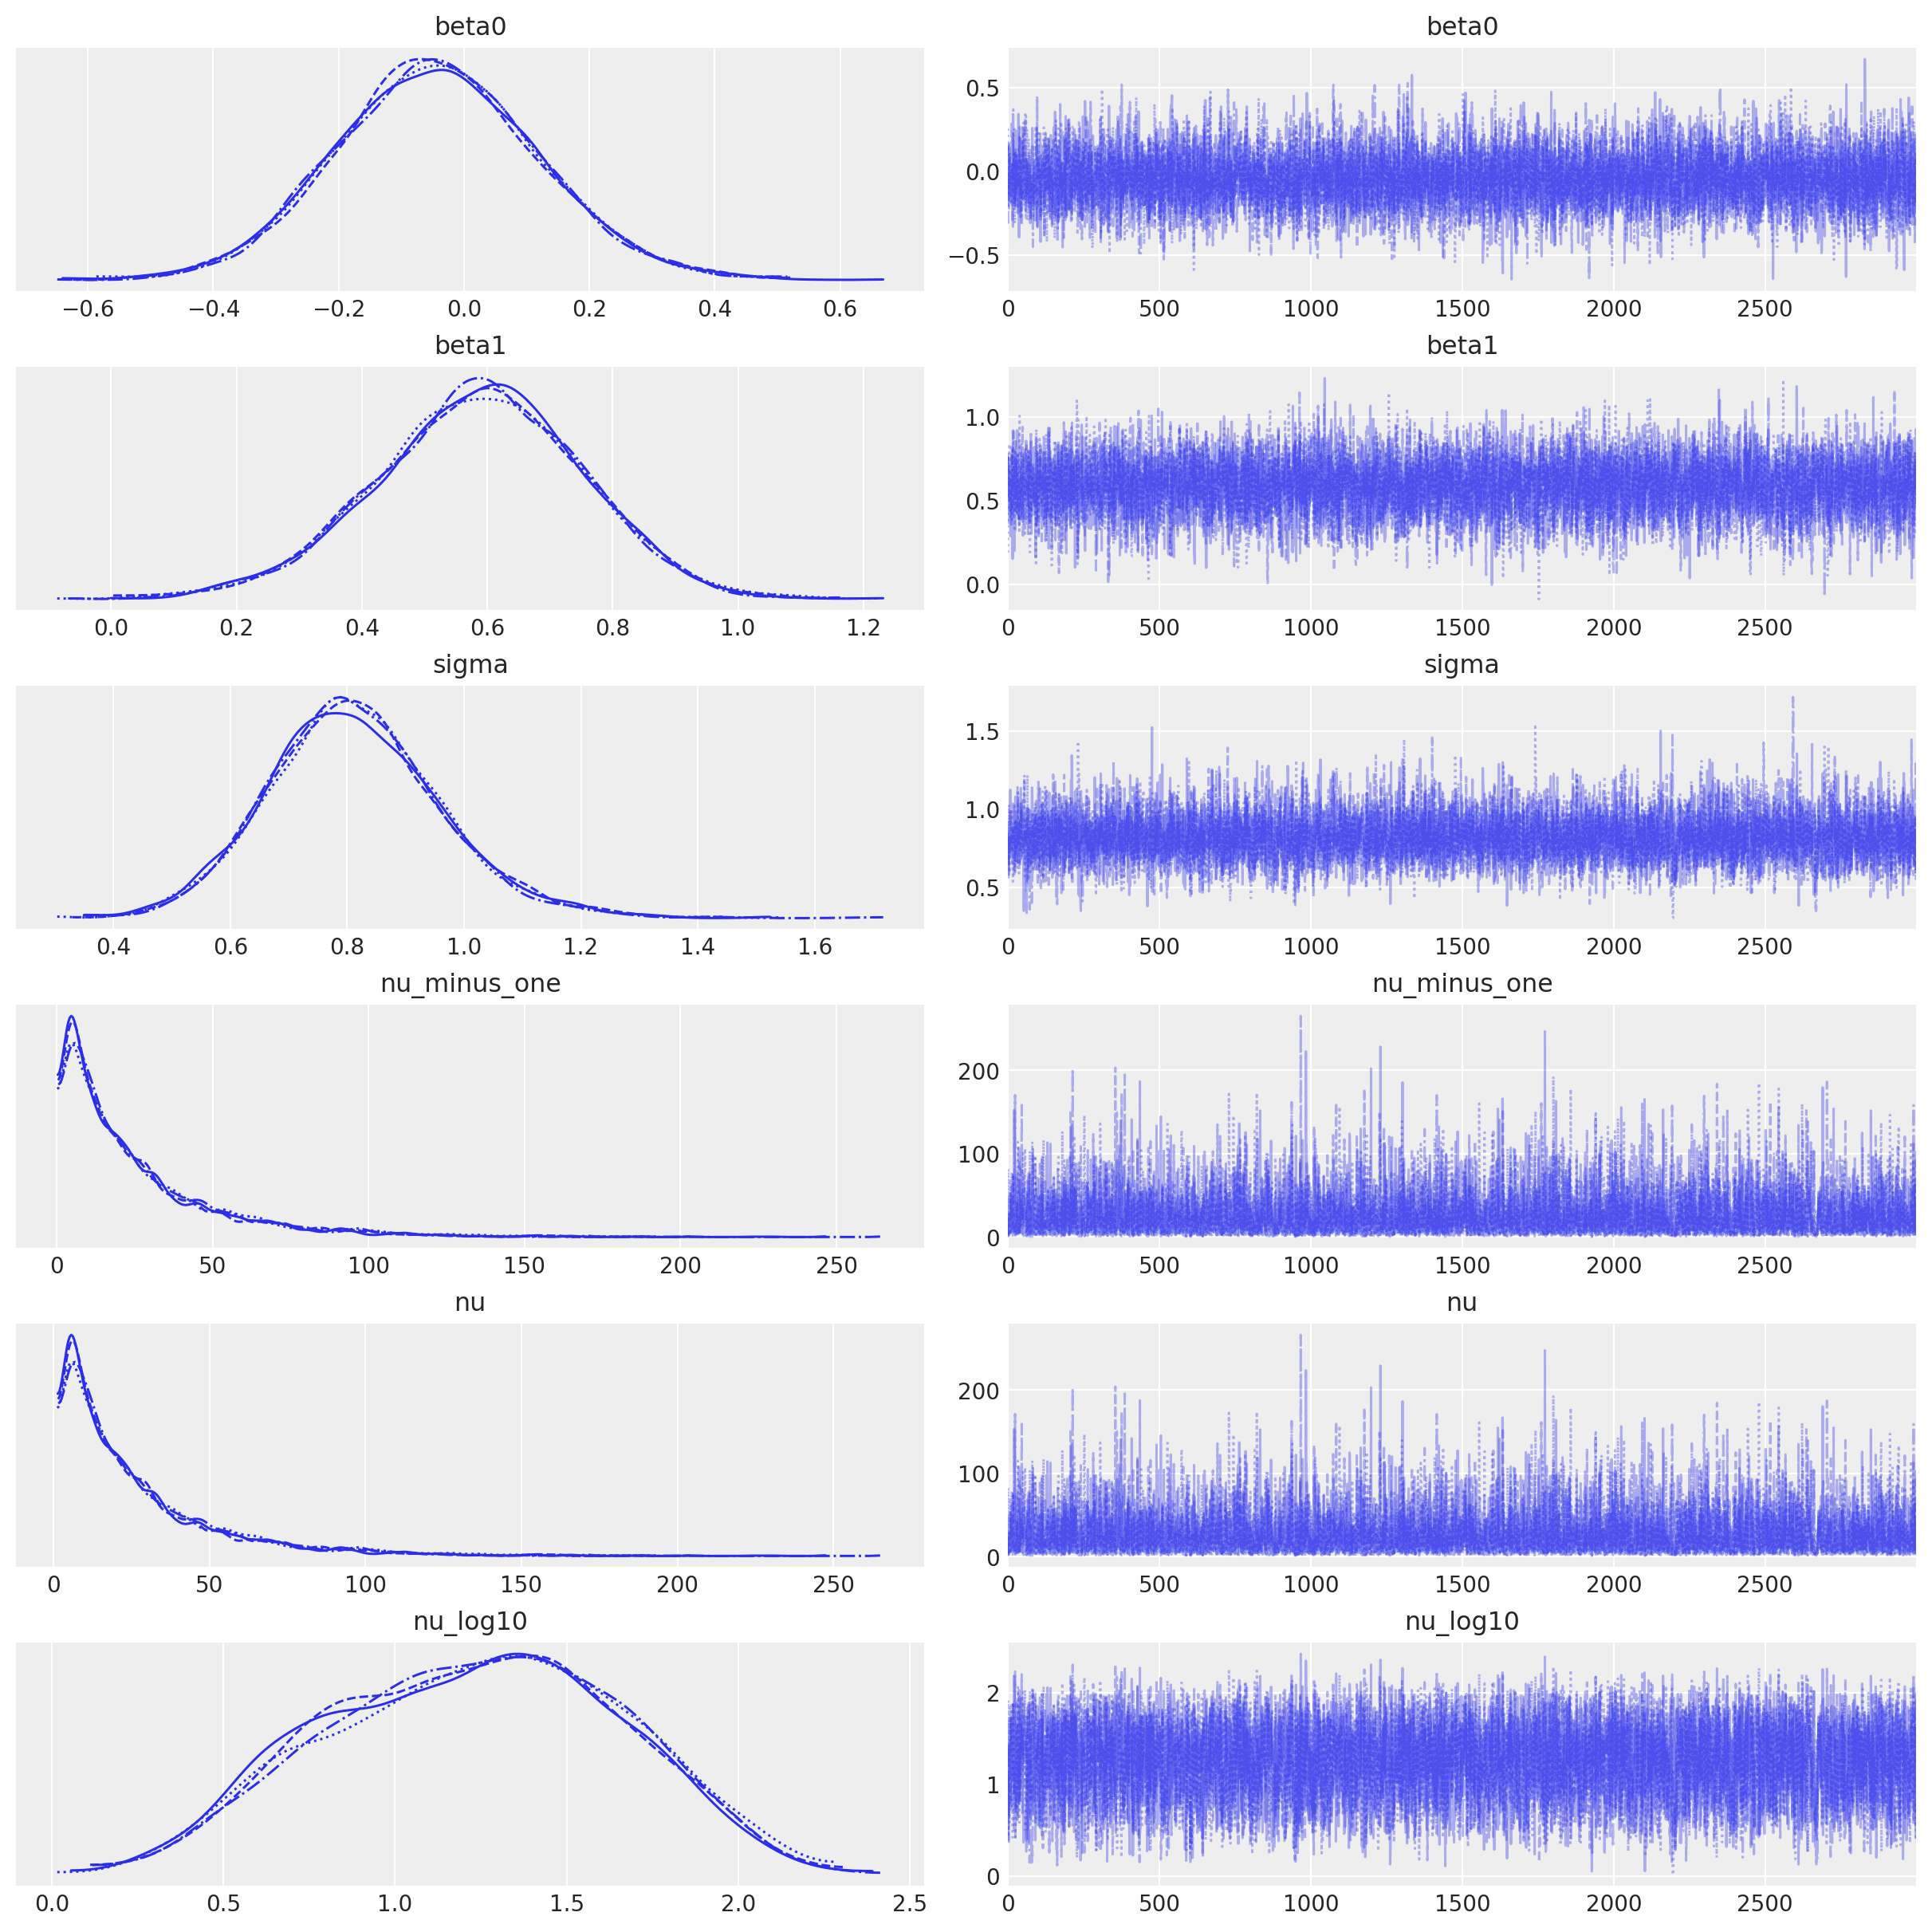

In [13]:
pm.plot_trace(idata);

In [14]:
post = idata.posterior
post

<xarray.Dataset>
Dimensions:       (chain: 4, draw: 3000)
Coordinates:
  * chain         (chain) int64 0 1 2 3
  * draw          (draw) int64 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
Data variables:
    beta0         (chain, draw) float64 0.1488 -0.2017 ... -0.1154 -0.2454
    beta1         (chain, draw) float64 0.3657 0.716 0.755 ... 0.9272 0.837
    sigma         (chain, draw) float64 0.9108 0.8173 0.7096 ... 1.024 0.9072
    nu_minus_one  (chain, draw) float64 48.11 14.37 6.154 ... 23.84 104.9 96.24
    nu            (chain, draw) float64 49.11 15.37 7.154 ... 24.84 105.9 97.24
    nu_log10      (chain, draw) float64 1.691 1.187 0.8546 ... 1.395 2.025 1.988
Attributes:
    created_at:                 2022-11-05T19:43:19.519062
    arviz_version:              0.13.0
    inference_library:          pymc
    inference_library_version:  4.2.2
    sampling_time:              20.769126892089844
    tuning_steps:               1000

In [15]:
stacked = az.extract(post)

In [16]:
stacked["beta0_r"], stacked["beta_r"], stacked["sigma_r"] = bst.unstandardize_linreg_parameters(stacked["beta0"], stacked["beta1"], mu_h, mu_y, stacked["sigma"], sigma_h, sigma_y)

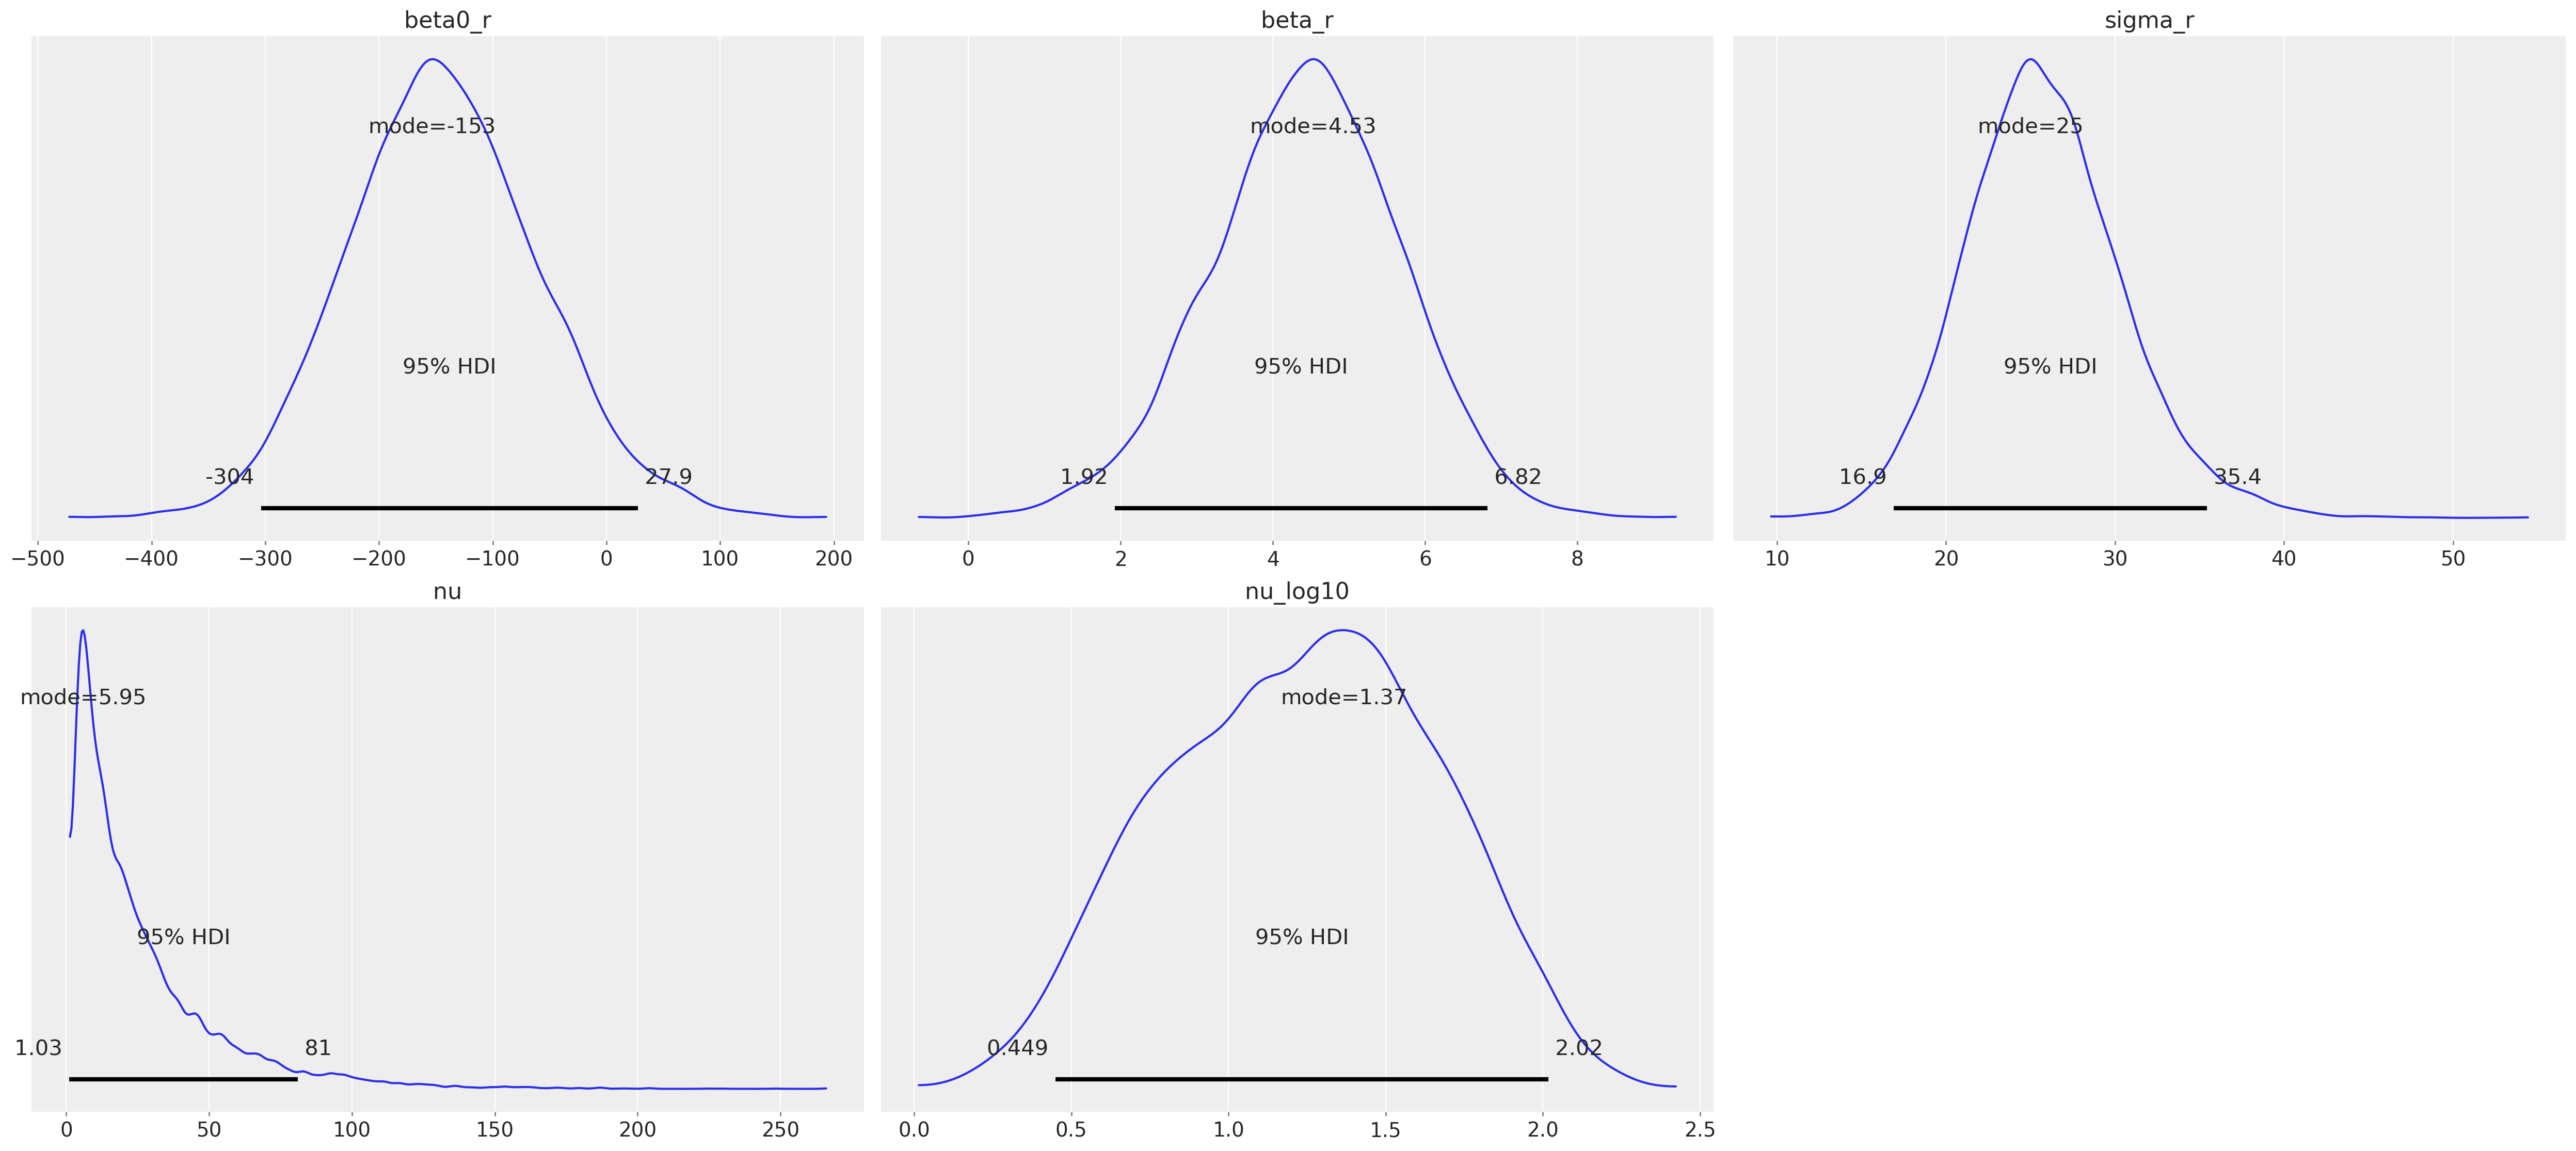

In [17]:
az.plot_posterior(stacked, combine_dims={"sample"}, 
                  var_names=["beta0_r", "beta_r", "sigma_r", "nu", "nu_log10"], 
                  point_estimate="mode", round_to=3);